In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import requests
import csv
from decimal import Decimal
import seaborn as sns
import numpy as np

In [2]:
os.chdir(r"C:\Users\tunc-\Desktop\uni\04_FS23\seminar\03_code")

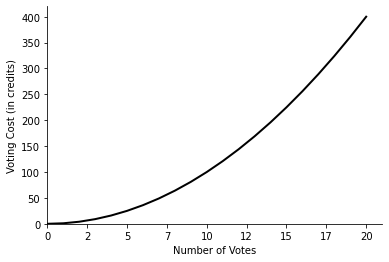

In [3]:
# Define the quadratic voting function
def quadratic_voting_cost(votes):
    return votes ** 2

# Set up the range of votes (x-axis)
votes = np.arange(0, 21, 1)

# Calculate the cost for each number of votes
cost = quadratic_voting_cost(votes)

fig, ax = plt.subplots()

# Plot the line without dots
ax.plot(votes, cost, '-', linewidth=2, color='black')
ax.set_xlabel('Number of Votes')
ax.set_ylabel('Voting Cost (in credits)')

# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Format the tick labels to display whole numbers
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))

# Remove the grid
ax.grid(False)

# Set the limits of the x and y axes
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

# Save Graph
plt.savefig('plots/qv-function.pdf', bbox_inches='tight')

# Show the plot
plt.show()

In [6]:
# Snapshot Gitcoin Quadtratic Voting Poll
df = pd.read_csv("./data/snapshot-report-qv.csv")

# Create a new DataFrame from the filtered data
df = df.copy()

In [7]:
unique_voters = df['address'].nunique()
print(f"Number of unique voters: {unique_voters}")

Number of unique voters: 32


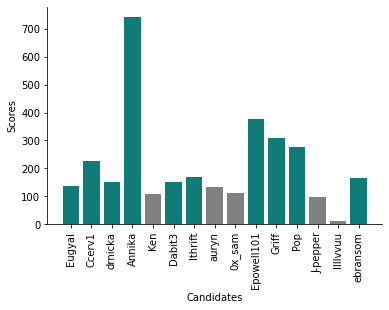

In [8]:
# retrieved from snapshot graphql - manually for the first plot because of snapshot issues.
choices = ["Eugyal", "Ccerv1", "drnicka", "Annika", "Ken", "Dabit3", "lthrift", "auryn", "0x_sam", "Epowell101", "Griff", "Pop", "J-pepper", "llllvvuu", "ebransom"]
scores = [135.12327942476793,225.56674114143848,152.07043620052798,742.0457931346454,109.47176537133085,
    152.28703308695938,
    170.40716375570267,
    133.544031760696,
    112.1457842545922,
    376.5271902129055,
    308.81007239615957,
    274.9222127438973,
    98.76430995840973,
    12.552639518150457,
    163.76154703981658
]

# manual because snapshot voting results are not standardized

# Create a DataFrame with the given data
data = pd.DataFrame({'Choices': choices, 'Scores': scores})

# Get the indices of the highest 10 scores
top_10_indices = data['Scores'].nlargest(10).index

# Assign colors based on whether the score is in the top 10 or not
colors = ['#117B78' if i in top_10_indices else 'gray' for i in range(len(scores))]

# Plot the bar plot
fig, ax = plt.subplots()
ax.bar(choices, scores, color=colors)

ax.set_ylabel('Scores')
ax.set_xlabel('Candidates')
# ax.set_title('Scores per Candidate')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation=90)

plt.savefig('plots/qv-choices.pdf', bbox_inches='tight')


plt.show()

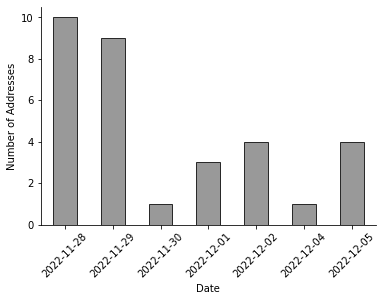

In [9]:
# Convert 'date_utc' column to datetime type
df['date_utc'] = pd.to_datetime(df['date_utc'])

# Group the data by day and count the number of votes per day
votes_per_day = df['date_utc'].dt.floor('d').value_counts().sort_index()

# Create a bar plot
fig, ax = plt.subplots()
votes_per_day.plot(kind='bar', ax=ax, color='gray', edgecolor='black', alpha=0.8)

# Set labels and title
ax.set_ylabel('Number of Addresses')
ax.set_xlabel('Date')
# ax.set_title('Number of Addresses Voted per Day')

# Format x-axis labels
ax.set_xticklabels(votes_per_day.index.strftime('%Y-%m-%d'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Remove the upper and right lines of the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('plots/qv-voted-per-day.pdf', bbox_inches='tight')

# Show the plot
plt.show()

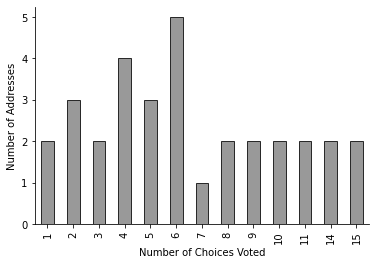

In [10]:
# Assume df is your DataFrame
vote_counts = df.filter(regex='choice.*').count(axis=1).value_counts().sort_index()

# Create a bar plot
fig, ax = plt.subplots()
vote_counts.plot(kind='bar', ax=ax, color='gray', edgecolor='black', alpha=0.8)

# Set labels and title
ax.set_ylabel('Number of Addresses')
ax.set_xlabel('Number of Choices Voted')
# ax.set_title('Addresses Voting for Different Numbers of Choices')

# Remove the upper and right lines of the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('plots/qv-voted-choices.pdf', bbox_inches='tight')

# Show the plot
plt.show()